# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

### Bases de Dados

In [ ]:
import pandas as pd

# Importando as bases
df_cliente = pd.read_csv(r'C:\Users\julia\Downloads\CadastroClientes.csv', sep=';', decimal=',')
df_funcionario = pd.read_csv(r'C:\Users\julia\Downloads\CadastroFuncionarios.csv' , sep=';', decimal=',')
df_servico = pd.read_excel(r'C:\Users\julia\Downloads\BaseServiçosPrestados.xlsx')

# Convertendo as colunas para tipo float
df_funcionario['VT'] = df_funcionario['VT'].astype(float)
df_funcionario['Salario Base'] = df_funcionario['Salario Base'].astype(float)

#display(df_cliente)
#display(df_funcionario)
#display(df_servico)

### 1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?

In [ ]:
# Criando a coluna "Salario Total Funcionario" para armazenar a soma dos itens do salario do funcionario

#df_funcionario['Salario Total Funcionario'] = df_funcionario['Salario Base'] \
#+ df_funcionario['Impostos'] \
#+ df_funcionario['Beneficios'] \
#+ df_funcionario['VT'] \
#+ df_funcionario['VR']

df_funcionario['Salario Total Funcionario'] = df_funcionario['Salario Base'] + df_funcionario['Impostos'] + df_funcionario['Beneficios'] + df_funcionario['VT'] + df_funcionario['VR']

# Somar o valor total de todos os funcionarios
total_folha = df_funcionario['Salario Total Funcionario'].sum()

print ('O valor total da folha salarial dos funcionários da empresa foi de R$ {:,.2f}'.format(total_folha))

O valor total da folha salarial dos funcionários da empresa foi de R$ 2,717,493.22


### 2. Qual foi o faturamento da empresa?

In [ ]:
# Juntar os dois dataframes pela chave "ID Cliente"
#df_cliente_servico = pd.merge(df_cliente, df_servico, on='ID Cliente')
df_cliente_servico = df_servico.merge(df_cliente, on='ID Cliente')

# Multiplicar o "Valor Contrato Mensal" com "Tempo Total de Contrato (Meses)"
df_cliente_servico['Total'] = df_cliente_servico['Valor Contrato Mensal'] * df_cliente_servico['Tempo Total de Contrato (Meses)']

# Convertendo as colunas para o tipo float
df_cliente_servico['Valor Contrato Mensal'] = df_cliente_servico['Valor Contrato Mensal'].astype(float)
df_cliente_servico['Total'] = df_cliente_servico['Total'].astype(float)

# Agrupar o faturamento total pelo "Codigo do Servico"
df_faturamento_por_servico = df_cliente_servico.groupby('Codigo do Servico')['Total'].sum()
display(df_faturamento_por_servico)

# Somar a coluna Total
df_faturamento_total = sum(df_cliente_servico['Total'])
print('O faturamento total é de: R$ {:,.2f}'.format(df_faturamento_total))

Codigo do Servico
OS0001     7560.0
OS0002    15120.0
OS0003    35280.0
OS0004    28080.0
OS0005    18720.0
           ...   
OS0233     6300.0
OS0234    29520.0
OS0235    14310.0
OS0236    58590.0
OS0237    29160.0
Name: Total, Length: 237, dtype: float64

O faturamento total é de: R$ 5,519,160.00


### 3. Qual o % de funcionários que já fechou algum contrato?

In [ ]:
# Contar os funcionarios unicos que tiveram servicos
#funcionario_fechou_contrato = df_servico['ID Funcionário'].nunique() # assim também funciona

# Contar os funcionarios na base de funcionarios
qte_total_funcionario = df_funcionario['ID Funcionário'].count()

# Encontrar o percentual dividindo a qtde de funcionarios que tiveram servicos com a qtde de funcionarios na base
porcent_func_fech_contr = (funcionario_fechou_contrato / qte_total_funcionario) * 100

print('A porcentagem de funcionários que fecharam contratos é de {:.2f}%'.format(porcent_func_fech_contr))

A porcentagem de funcionários que fecharam contratos é de 86.84%


### 4. Calcule o total de contratos que cada área da empresa já fechou

,Area
Administrativo,63
Operações,48
Comercial,44
Financeiro,42
Logística,40


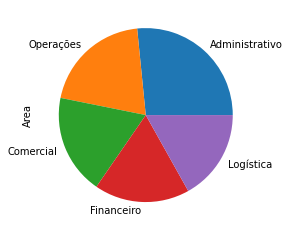

In [ ]:
# Juntar as bases de funcionario e servico pelo "ID Funcionario"
df_contratos_por_area = pd.merge(df_funcionario, df_servico, on='ID Funcionário')

# Contar a area
df_contratos_por_area = df_contratos_por_area['Area'].value_counts()
df = pd.DataFrame(df_contratos_por_area)

# Agrupar os contratos pela area
#f_contratos_por_area = df_contratos_por_area.groupby('Area')['Codigo do Servico'].nunique()
#display(df_contratos_por_area)

df_contratos_por_area.plot(kind='pie');
df

### 5. Calcule o total de funcionários por área

,ID Funcionário
Area,
Administrativo,26
Comercial,26
Financeiro,18
Logística,21
Operações,23


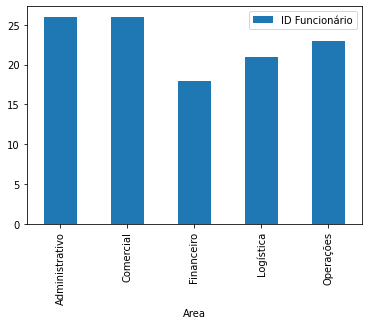

In [ ]:
# Trazer somente as colunas que eu quero trabalhar
funcionario_por_area = df_funcionario[['ID Funcionário', 'Area']]

# Agrupar os funcionarios por area
#funcionario_por_area = funcionario_por_area.groupby('Area')['ID Funcionário'].nunique()
#funcionario_por_area = funcionario_por_area['Area'].value_counts()
funcionario_por_area2  = funcionario_por_area.groupby('Area').count()

funcionario_por_area2.plot(kind='bar')

display(funcionario_por_area2)

### 6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [ ]:
# Calcular a média de contratos mensais
ticket_medio_mensal = df_cliente['Valor Contrato Mensal'].mean()

print('O ticket médio mensal dos contratos é de: R$ {:,.2f}'.format(ticket_medio_mensal))

O ticket médio mensal dos contratos é de: R$ 2,502.56
